In [0]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [0]:
np.random.seed(0)
tf.set_random_seed(1234)

In [0]:
def inference(x, keep_prob, n_in, n_hiddens, n_out):
  def weight_variable(shape):
    #重みを正規分布に従いランダムに初期化。stddivは標準偏差
    initial = tf.truncated_normal(shape, stddev = 0.01)
    return tf.Variable(initial)
  
  def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial)
  
  for i, n_hidden in enumerate(n_hiddens):
    if i == 0:
      input = x
      input_dim = n_in
      
    else:
      input = output
      input_dim = n_hiddens[i - 1]
      
    W = weight_variable([input_dim, n_hidden])
    b = bias_variable([n_hidden])
    
    h = tf.nn.relu(tf.matmul(input, W) + b)
    output = tf.nn.dropout(h, keep_prob)
    
  #n_hiddens[-1]はn_hiddensの最後を指している
  W_out = weight_variable([n_hiddens[-1], n_out])
  b_out = bias_variable([n_out])
  y = tf.nn.softmax(tf.matmul(output, W_out) + b_out)
  return y

In [0]:
def loss(y, t):
  #tf.clip_by_valueによって下限、上限が決まる。
  cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(tf.clip_by_value(y,1e-10, 1.0)),
                                               axis = 1))
  return cross_entropy


In [0]:
def training(loss):
  optimizer = tf.train.GradientDescentOptimizer(0.01)
  train_step = optimizer.minimize(loss)
  return train_step

In [0]:
def accuracy(y,t):
  corrent_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(t,1)) 
  accuracy = tf.reduce_mean(tf.cast(corrent_prediction, tf.float32))
  return accuracy

In [109]:
if __name__ == '__main__':
  mnist = datasets.fetch_mldata('MNIST original' , data_home = '.')
  
  n = len(mnist.data)
  N = 30000
  N_train = 20000
  N_validation = 4000
  indices = np.random.permutation(range(n))[:N]
  


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [110]:
  print('n_len: ',len(mnist.data))
  print(indices)
  print(len(indices))

n_len:  70000
[10840 56267 14849 ... 22709  6062 38786]
30000


In [111]:
  #indicesによりランダムに30000このデータを取得
  X = mnist.data[indices]
  y = mnist.target[indices]
  Y = np.eye(10)[y.astype(int)]
  
  X_train, X_test , Y_train, Y_test = train_test_split(X,Y,train_size = N_train)
  
  X_train,X_validation, Y_train,Y_validation = train_test_split(X_train,Y_train, test_size = N_validation)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [112]:
print(y)

[1. 9. 2. ... 3. 1. 6.]


In [113]:
  n_in = len(X[0])
  n_hiddens = [200,200,200]
  n_out = len(Y[0])
  p_keep = 0.5

  x = tf.placeholder(tf.float32, shape = [None, n_in])
  t = tf.placeholder(tf.float32, shape = [None, n_out])
  keep_prob = tf.placeholder(tf.float32)

  y = inference(x,keep_prob, n_in = n_in, n_hiddens = n_hiddens, n_out = n_out)
  #デバック用
  print(x)
  print(keep_prob)
  print(n_in)
  print(n_hiddens)
  print(n_out)
  print('t: ',t)
  print('y: ',y)
  #y,tの値がおかしいかも
  loss = loss(y, t)
  train_step = training(loss)

  accuracy = accuracy (y,t)

  history = {
      'val_loss': [],
      'val_acc': []
  }

Tensor("Placeholder_57:0", shape=(?, 784), dtype=float32)
Tensor("Placeholder_59:0", dtype=float32)
784
[200, 200, 200]
10
t:  Tensor("Placeholder_58:0", shape=(?, 10), dtype=float32)
y:  Tensor("Softmax_11:0", shape=(?, 10), dtype=float32)


In [0]:
  #モデル学習
  epochs = 50
  batch_size = 200

  init = tf.global_variables_initializer()
  sess = tf.Session()
  sess.run(init)

In [0]:
  n_batchs = N_train // batch_size

In [116]:
  for epoch in range(epochs):
    X_,Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batchs):
      start = i * batch_size
      end = start + batch_size
      
      sess.run(train_step, feed_dict = {
          x: X_[start:end],
          t: Y_[start:end],
          keep_prob: p_keep
      })
      
    val_loss = loss.eval(session = sess, feed_dict = {
        x: X_validation,
        t: Y_validation,
        keep_prob: 1.0
    })
    
    val_acc = accuracy.eval(session = sess, feed_dict = {
        x: X_validation,
        t: Y_validation,
        keep_prob: 1.0
    })
    
    #検証データの学習進みぐらいを記録
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    
    print('epoch:',epoch,
              'validation loss: ',val_loss,
              'validation accuracy: ',val_acc)
    


epoch: 0 validation loss:  2.150253 validation accuracy:  0.2195
epoch: 1 validation loss:  0.74438477 validation accuracy:  0.80025
epoch: 2 validation loss:  0.5138142 validation accuracy:  0.84575
epoch: 3 validation loss:  0.40017936 validation accuracy:  0.88375
epoch: 4 validation loss:  0.3386078 validation accuracy:  0.903
epoch: 5 validation loss:  0.29083326 validation accuracy:  0.9145
epoch: 6 validation loss:  0.26697007 validation accuracy:  0.923
epoch: 7 validation loss:  0.24444641 validation accuracy:  0.92425
epoch: 8 validation loss:  0.22941867 validation accuracy:  0.9325
epoch: 9 validation loss:  0.20797136 validation accuracy:  0.9405
epoch: 10 validation loss:  0.20254454 validation accuracy:  0.941
epoch: 11 validation loss:  0.19192849 validation accuracy:  0.94625
epoch: 12 validation loss:  0.18560526 validation accuracy:  0.95
epoch: 13 validation loss:  0.18101598 validation accuracy:  0.95
epoch: 14 validation loss:  0.17942555 validation accuracy:  0.9

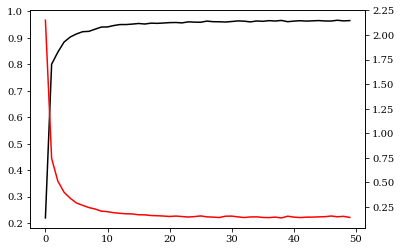

In [122]:
  #学習の進み具合を可視化
  plt.rc('font', family = 'serif') #フォント設定
  #plt.rc('font', family = 'serif')
  fig = plt.figure() #グラフの準備
  ax_acc = fig.add_subplot(111) #予測精度用の軸設定
  ax_acc.plot(range(epochs), history['val_acc'], label = 'acc', color = 'black') #グラフに値を設定
  ax_loss = ax_acc.twinx()#損失用の軸を設定
  ax_loss.plot(range(epochs), history['val_loss'], label = 'loss', color = 'red')
  plt.xlabel('epochs')#グラフ軸の名称
  #plt.xlabel('epochs')
  plt.show()
  #plt.savefig('mnist_tensorflow.eps')


In [123]:
  
  #精度予測
  accuracy_rate = accuracy.eval(session = sess, feed_dict = {
      x: X_test,
      t: Y_test,
      keep_prob: 1.0
  })
  print('accuracy: ',accuracy_rate)

accuracy:  0.9649
